<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/PHYS434_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


# Part I Sphere in 3D

In [2]:
def random_square(n= 1, R=1):
    points = []
    for _ in range(n):
        points.append(R * (2 * np.random.random(3) -1))
    return np.array(points)


## a. Uniform density (3 points)

In [3]:
N = 100
ρ = 2
r = 1
Vol = 4/3 * np.pi * r**3

# Generate random points within the sphere
points = random_square(n=N, R=r)

# Calculate the volume using Monte Carlo integration
inside_sphere = 0
for x, y, z in points:
    if x**2 + y**2 + z**2 <= r**2:
        inside_sphere += 1

estimated_mass = ρ*(inside_sphere / N) * (8 * r**3)
actual_mass = ρ*(4/3) * np.pi * r**3
print(f'Monte Carlo mass = {estimated_mass}Kg ± {1/np.sqrt(N)}Kg, Actuall Mass = {actual_mass}Kg')

Monte Carlo mass = 8.48Kg ± 0.1Kg, Actuall Mass = 8.377580409572781Kg


In [4]:
N = 1000
Big_N = 100
ρ = 2
r = 1
Vol = 4/3 * np.pi * r**3

estimates = []
for i in range(Big_N):
    # Generate random points within the sphere
    points = random_square(n=N, R=r)

    # Calculate the volume using Monte Carlo integration
    inside_sphere = 0
    for x, y, z in points:
        if x**2 + y**2 + z**2 <= r**2:
            inside_sphere += 1

    estimated_mass = ρ*(inside_sphere / N) * (8 * r**3)
    estimates.append(estimated_mass)

estimate = np.mean(estimates)
actual_mass = ρ*(4/3) * np.pi * r**3
print(f'Monte Carlo mass = {estimate}Kg ± {np.var(estimates)}, Actuall Mass = {actual_mass}Kg')

Monte Carlo mass = 8.37824Kg ± 0.08192778240000013, Actuall Mass = 8.377580409572781Kg


The convergence, although it cannot be proven for a finite $N$, should go with $\frac{1}{\sqrt{N}}$

## b. Linear density (3 points)

Assume that in $\rho(r) = \rho_0 r $ such that $\rho_0 = \rho = 2kg/m^3 $

In [5]:
N = 1000
Big_N = 100
ρ = 2
r = 1
Vol = 4/3 * np.pi * r**3

estimates = []
#for i in range(Big_N):
i = 0
fact = True
while True:
    i += 1
    # Generate random points within the sphere
    points = random_square(n=N, R=r)

    # Calculate the volume using Monte Carlo integration
    inside_mass = 0
    for x, y, z in points:
        if x**2 + y**2 + z**2 <= r**2:
            inside_mass += ρ*np.sqrt(x**2 + y**2 + z**2)

    estimated_mass = (inside_mass / N) * (8 * r**3)
    estimates.append(estimated_mass)

    if i > 1:
        if np.var(estimates)/np.mean(estimates) <= 1/100 and 1/np.sqrt(i*N) <= 1/100:
            fact = False
            print(i)
            break
    else:
        print(i)

estimate = np.mean(estimates)
print(f'Monte Carlo mass = {estimate}Kg ± {np.var(estimates).round(3)} -> {(100*np.var(estimates)/estimate).round(3)}%')


1
10
Monte Carlo mass = 6.296172009729951Kg ± 0.051 -> 0.81%


# Part II Ising model (4 points)

In [6]:
def hamiltonian(S, J=1):
    rows, cols = S.shape
    H = 0.0
    for i in range(rows):
        for j in range(cols):
            neighbors_sum = (
                S[(i + 1) % rows, j] +
                S[(i - 1) % rows, j] +
                S[i, (j + 1) % cols] +
                S[i, (j - 1) % cols]
            )
            H -= J * S[i, j] * neighbors_sum
    return H

In [7]:
def S_step(S, H, T=1.5, J=1):
    rows, cols = S.shape
    S_0 = S.copy()
    H_0 = H.copy()

    fact = True
    while fact:
        H=H_0.copy()
        S=S_0.copy()
        # Choose a random site to flip
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)

        # Calculate the change in energy
        neighbors_sum = (
            S[(i + 1) % rows, j] +
            S[(i - 1) % rows, j] +
            S[i, (j + 1) % cols] +
            S[i, (j - 1) % cols]
        )

        chH = J * S[i, j] * neighbors_sum

        # Metropolis condition
        if chH <= 0 or np.random.random() < np.exp(chH / T):
            S[i, j] *= -1
            H += chH
            fact = False
            break

    return S, H, chH

## 1. Define $S_{n=0}$

In [8]:
S0 = np.ones((10,10))
H0 = hamiltonian(S0)

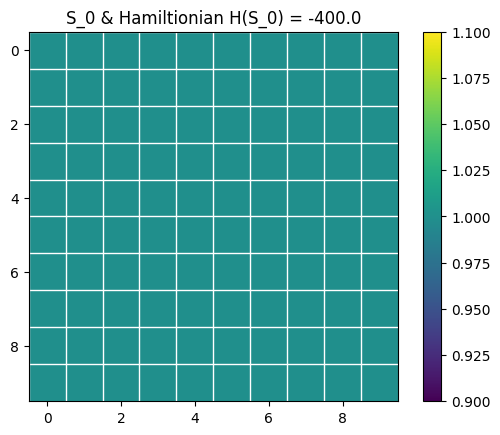

In [9]:
plt.imshow(S0, cmap='viridis', interpolation='none')

# Add grid lines for each corresponding value
for i in range(len(S0)):
    plt.axhline(i - 0.5, color='white', lw=1)
    plt.axvline(i - 0.5, color='white', lw=1)

plt.colorbar()
plt.title(f'S_0 & Hamiltionian H(S_0) = {H0}')

plt.show()

## 2. find $S_{n=1}$

In [10]:
S1, H1, chH = S_step(S0, H0)


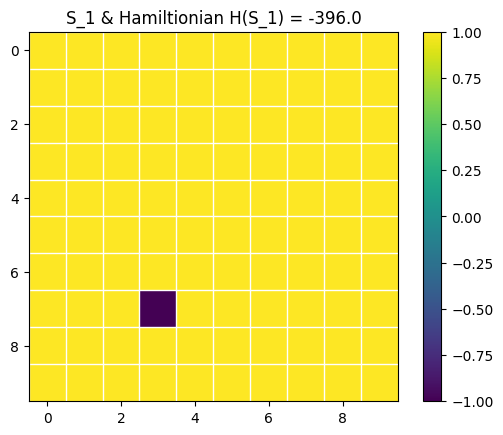

In [11]:
plt.imshow(S1, cmap='viridis', interpolation='none')

# Add grid lines for each corresponding value
for i in range(len(S1)):
    plt.axhline(i - 0.5, color='white', lw=1)
    plt.axvline(i - 0.5, color='white', lw=1)

plt.colorbar()
plt.title(f'S_1 & Hamiltionian H(S_1) = {H1}')
plt.show()

## Generate $S_{n} $ $\forall n\in[2,N]$

In [12]:
# Generate all n's
N = 1000
Set = [[S0, H0]]
S1, H1 = S0.copy(), H0.copy()
for i in range(N):
    S, H, chH = S_step(S1, H1)
    new = [S, H]
    Set.append(new)
    S1, H1 = S.copy(), H.copy()
np_set = np.array(Set)

<ipython-input-12-e70465905385>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np_set = np.array(Set)


### Plot matrices based on spin values
First 10 and after that every 50

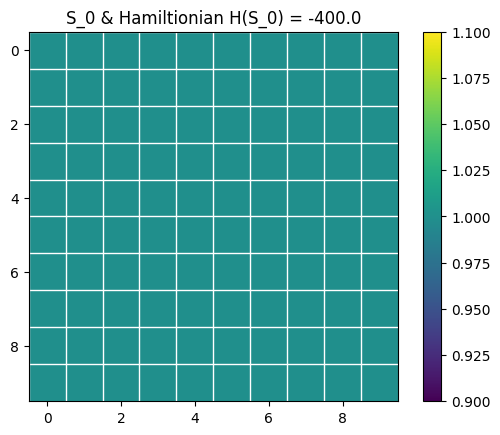

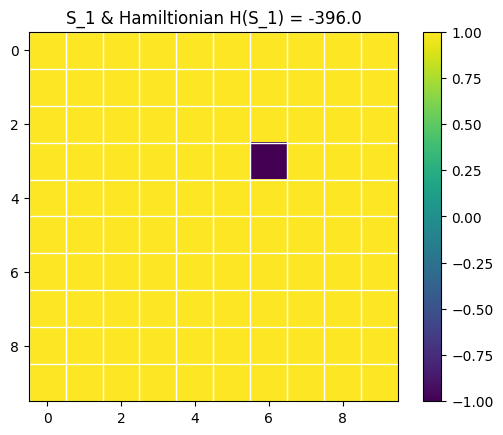

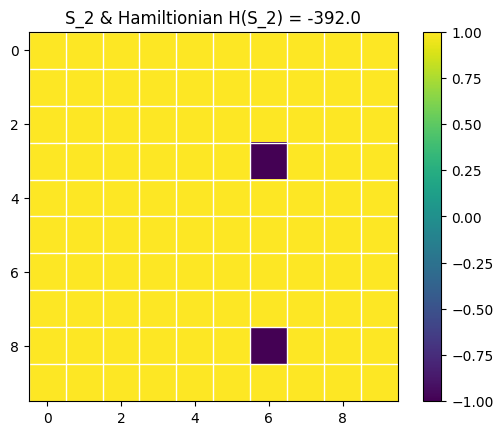

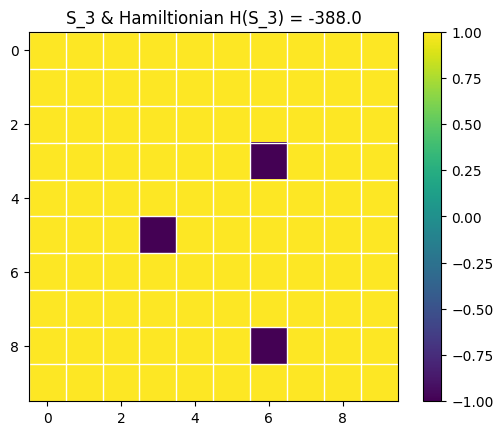

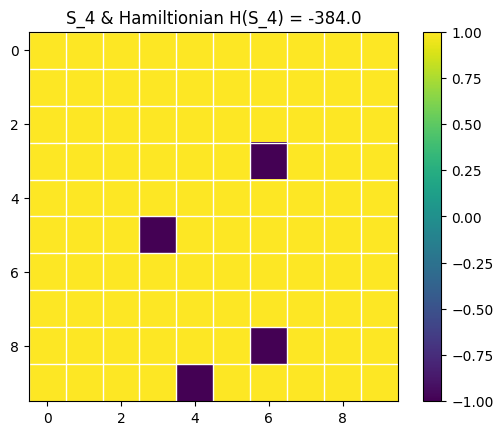

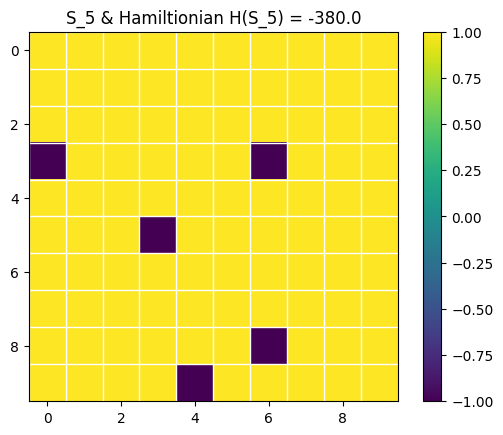

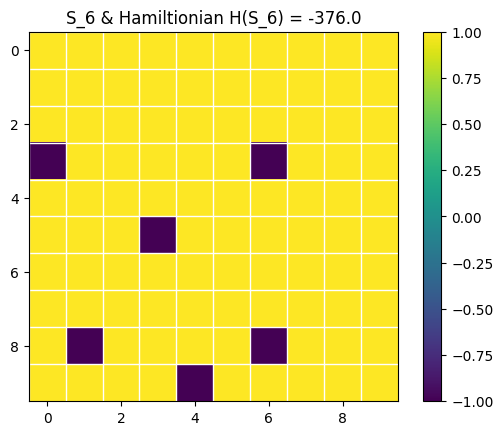

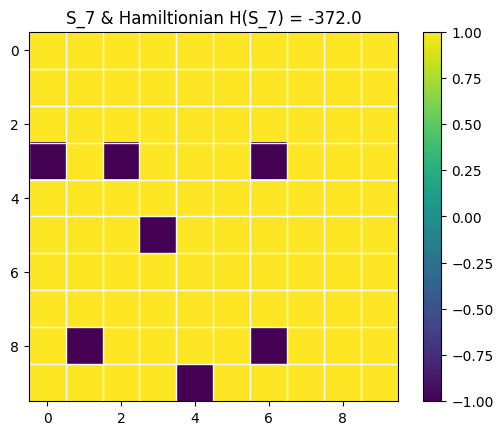

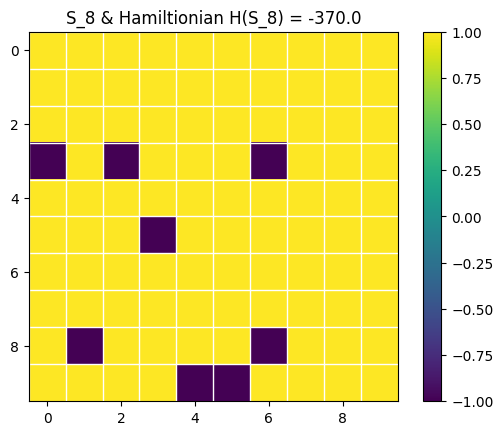

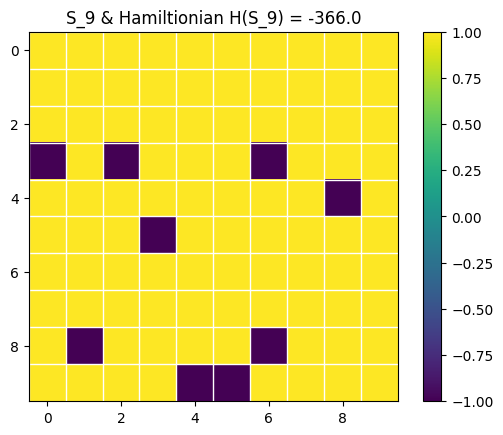

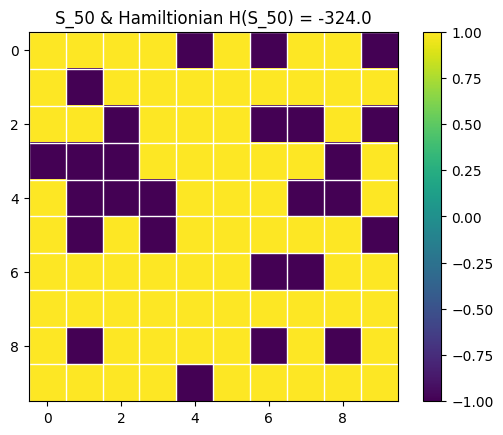

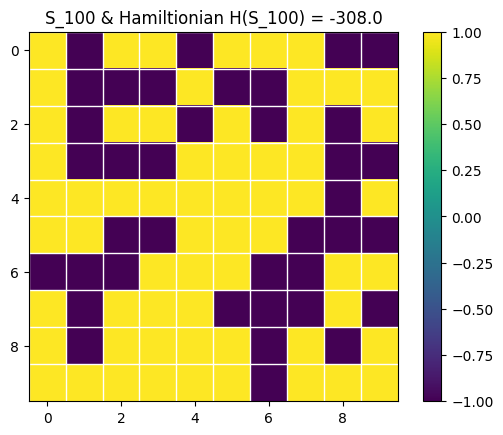

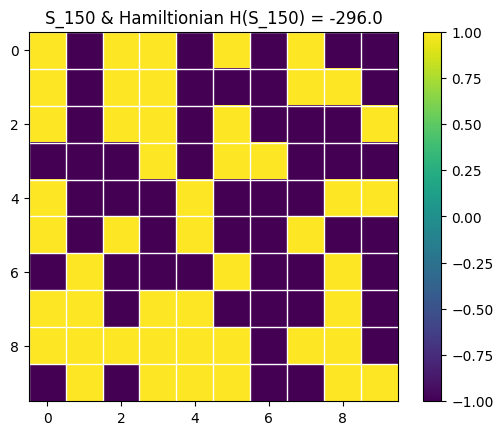

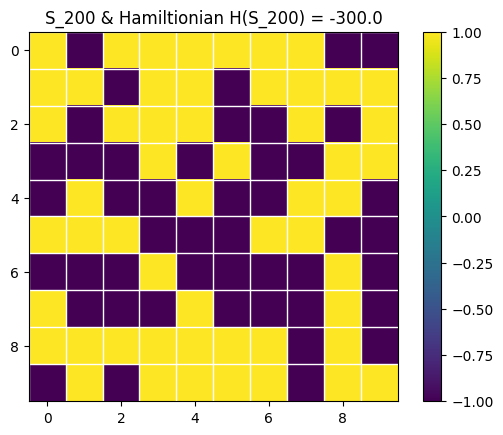

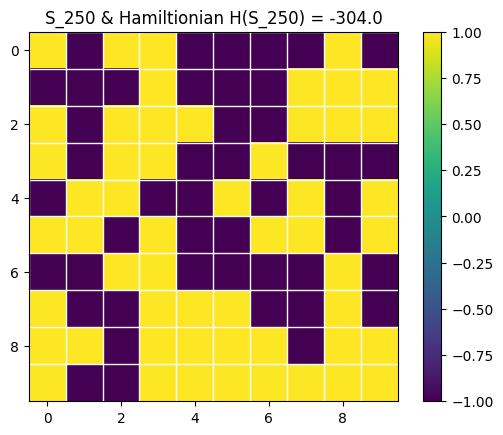

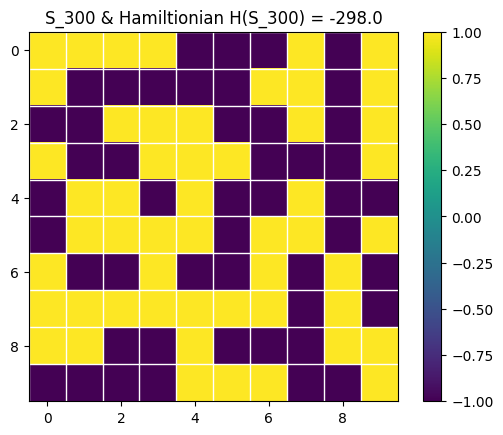

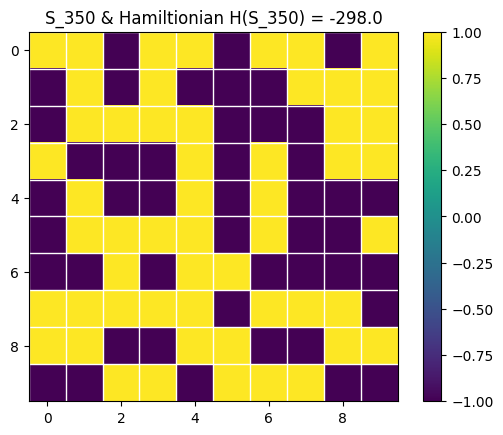

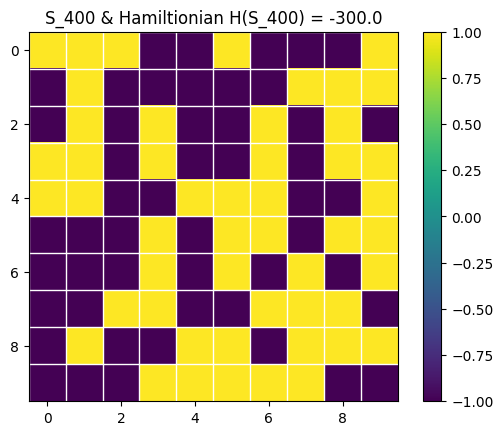

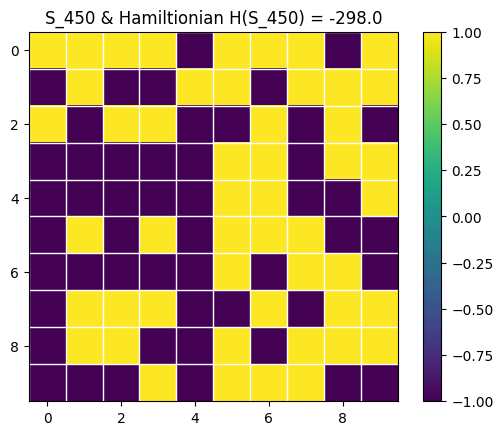

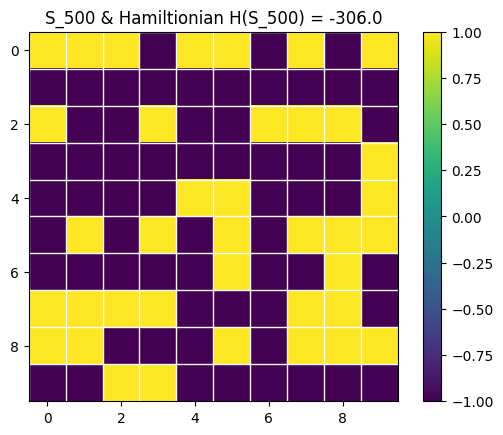

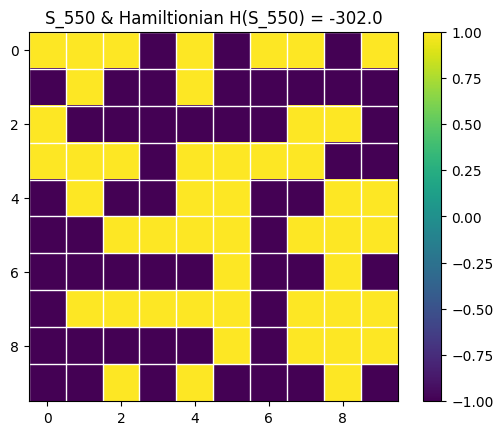

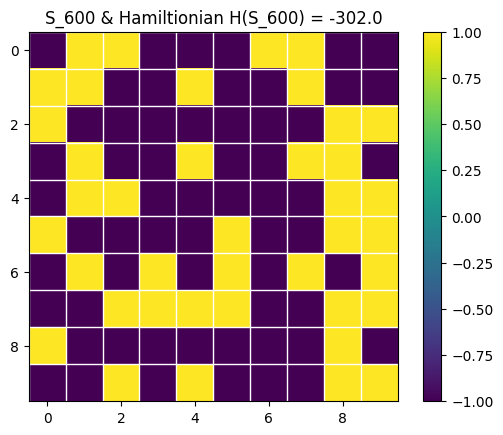

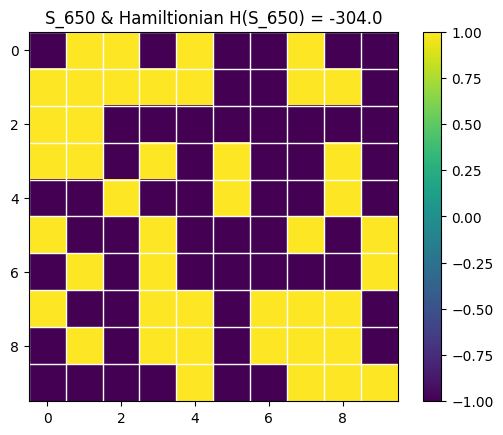

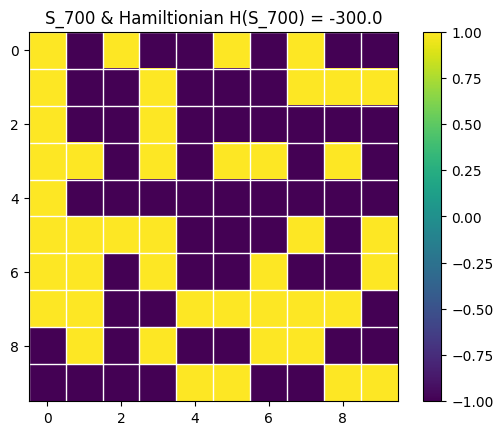

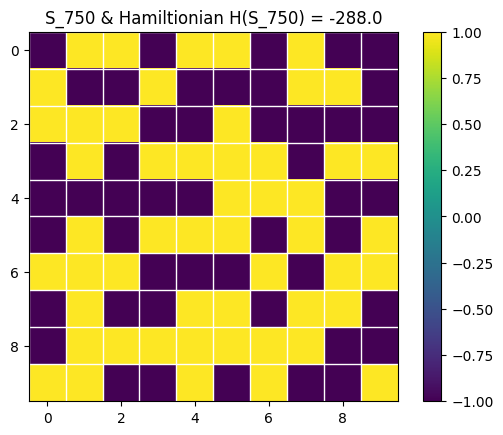

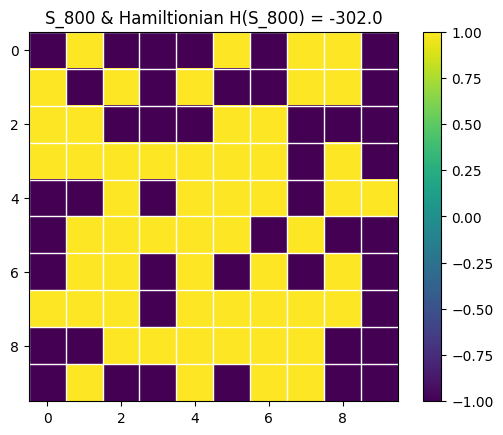

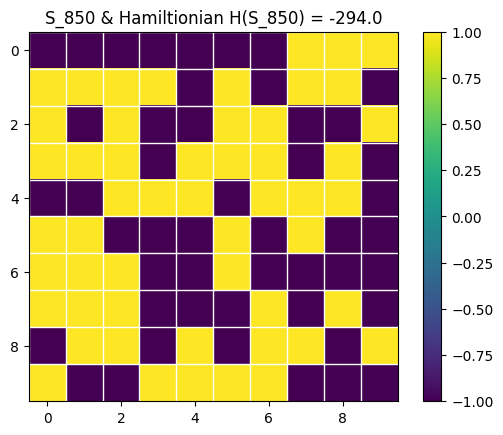

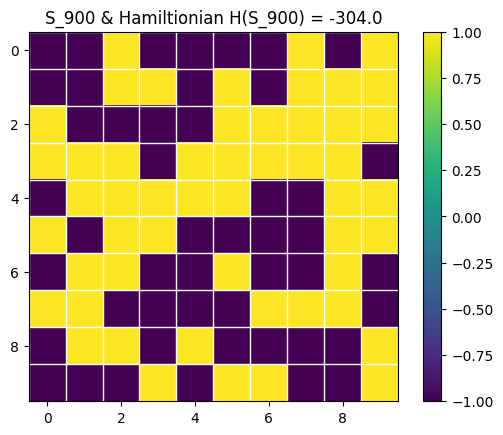

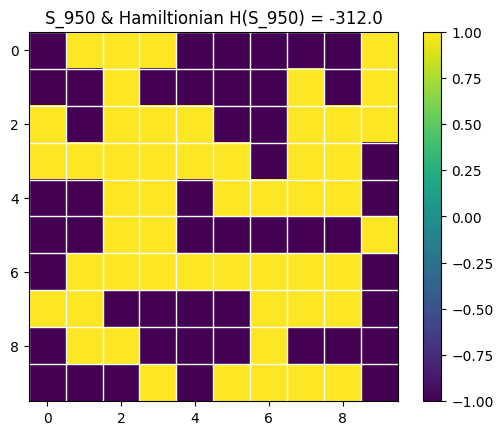

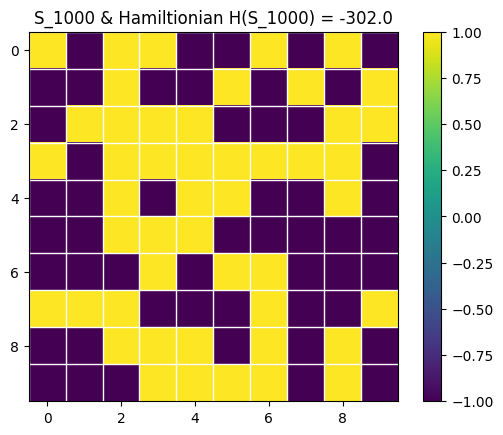

In [13]:
for n, Set in enumerate(np_set):
    if n % 50 == 0 or n in (range(10)):
        S = Set[0]
        H = Set[1]

        plt.imshow(S, cmap='viridis', interpolation='none')

        # Add grid lines for each corresponding value
        for i in range(len(S)):
            plt.axhline(i - 0.5, color='white', lw=1)
            plt.axvline(i - 0.5, color='white', lw=1)

        plt.colorbar()
        plt.title(f'S_{n} & Hamiltionian H(S_{n}) = {H}')
        plt.show()


### Plot of $𝔼[M(n)]$

In [14]:
# Calculate averages at all n's
means_S = np.array([])
for n, Set in enumerate(np_set):
    S = Set[0]
    H = Set[1]

    mean_S = np.mean(S)
    means_S = np.append(means_S, mean_S)


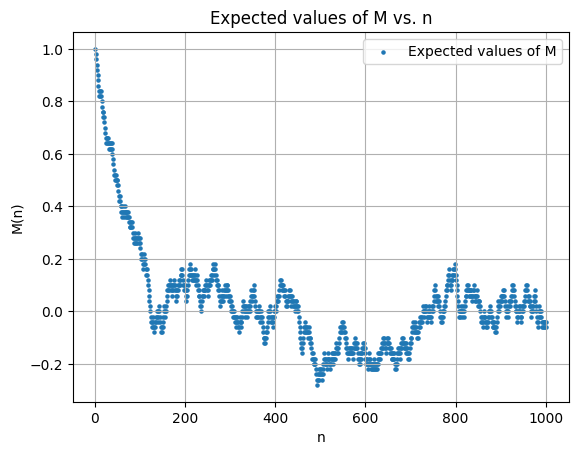

In [15]:
vec_N = np.arange(1, N+2)
plt.scatter(vec_N, means_S, label=f'Expected values of M', s=5)

plt.title('Expected values of M vs. n')
plt.xlabel('n')
plt.ylabel('M(n)')

plt.grid()
plt.legend()
plt.show()
